In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow # to display an image
from PIL import Image # image processing
import tensorflow as tf
tf.random.set_seed(3) # tensorflow's random function will produce same values everytime
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix # to compute the confusion matrix

In [40]:
# Loading the MNIST data from keras dataset
# This data is already processed
(x_train, y_train), (x_test, y_test) = mnist.load_data() # in form of numpy arrays

In [41]:
print(x_train.shape)
print(x_test.shape)

# Image dimension is 28x28 and it is a grayscale image (Image is already processed)

(60000, 28, 28)
(10000, 28, 28)


In [42]:
print(y_train.shape) # labels for x train
print(y_test.shape) # labls for x test

(60000,)
(10000,)


In [43]:
# Displaying the 10th image
print(x_train[10]) # in the form of numpy array and every pixel range (0-255)
print(x_train[10].shape)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

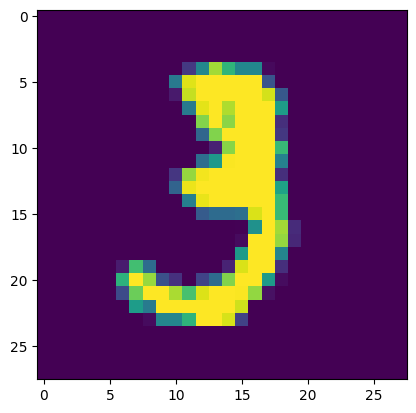

3


In [44]:
# Displaying the image
plt.imshow(x_train[10])
plt.show()
print(y_train[10])

In [45]:
# Unique value of Y_train
print(np.unique(y_train))
print(np.unique(y_test))

# we can use these labels as such or apply one hot encoding

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [46]:
# Scaling the data between (0-1) instead of (0-255) for better prediction and better model performance
x_train = x_train/255
x_test = x_test/255

In [47]:
print(x_train[1]) # rescaled values

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [48]:
# Building the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [49]:
# Setting up the layers of Neural Network
model = Sequential([
    Flatten(input_shape=(28,28)), # input layer
    Dense(128, activation='relu'), # hidden layer
    Dense(64, activation='relu'), # hidden layer
    Dense(10, activation='softmax') # output layer
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Compiling the Neural Network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
# Training the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8715 - loss: 0.4337
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9676 - loss: 0.1089
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9792 - loss: 0.0700
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9856 - loss: 0.0487
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9887 - loss: 0.0373
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9903 - loss: 0.0306
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9915 - loss: 0.0256
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9922 - loss: 0.0236
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9939 - loss: 0.0185
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9940 - loss: 0.0174


In [54]:
# Training data accuracy = 99.40%
# Accuracy on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9739 - loss: 0.1135
0.9779000282287598


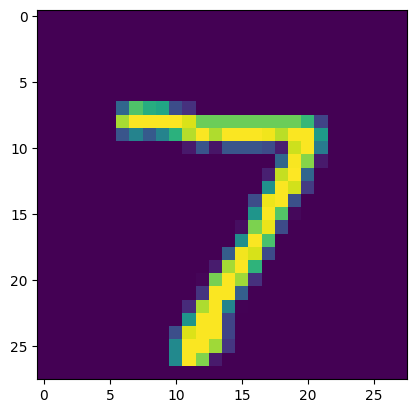

In [56]:
# First data point in X_test
plt.imshow(x_test[0])
plt.show()

In [57]:
print(y_test[0])

7


In [64]:
Y_pred = model.predict(x_test) # gives prediction probability of each class
print(Y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)


In [65]:
print(Y_pred[0])

[4.42178161e-09 1.27031805e-11 2.19934335e-10 3.80905441e-08
 1.71253081e-13 7.50868187e-11 2.92763968e-17 9.99975026e-01
 5.73144553e-11 2.48743763e-05]


In [68]:
# Coneverting prediction probability into class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 6, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 9, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [71]:
print(Y_pred_labels[0])
print(y_test[0])

# Y_pred_labels : prediction made by the model
# y_test : Actual labels

7
7


In [72]:
# Building a confusion matrix
cm = confusion_matrix(y_test, Y_pred_labels)
print(cm)

tf.Tensor(
[[ 970    0    0    1    1    0    2    0    2    4]
 [   0 1124    4    1    0    0    3    1    2    0]
 [   5    1 1005    2    2    0    3    5    9    0]
 [   0    0    4  989    0    2    0    3    4    8]
 [   0    0    2    0  967    0    6    3    0    4]
 [   3    0    0   13    1  868    2    1    4    0]
 [   2    3    0    0    1    4  947    0    1    0]
 [   0    1    6    3    1    1    1 1002    1   12]
 [   5    2    3    6    4    4    4    2  937    7]
 [   3    2    1    5   11    9    3    4    1  970]], shape=(10, 10), dtype=int32)


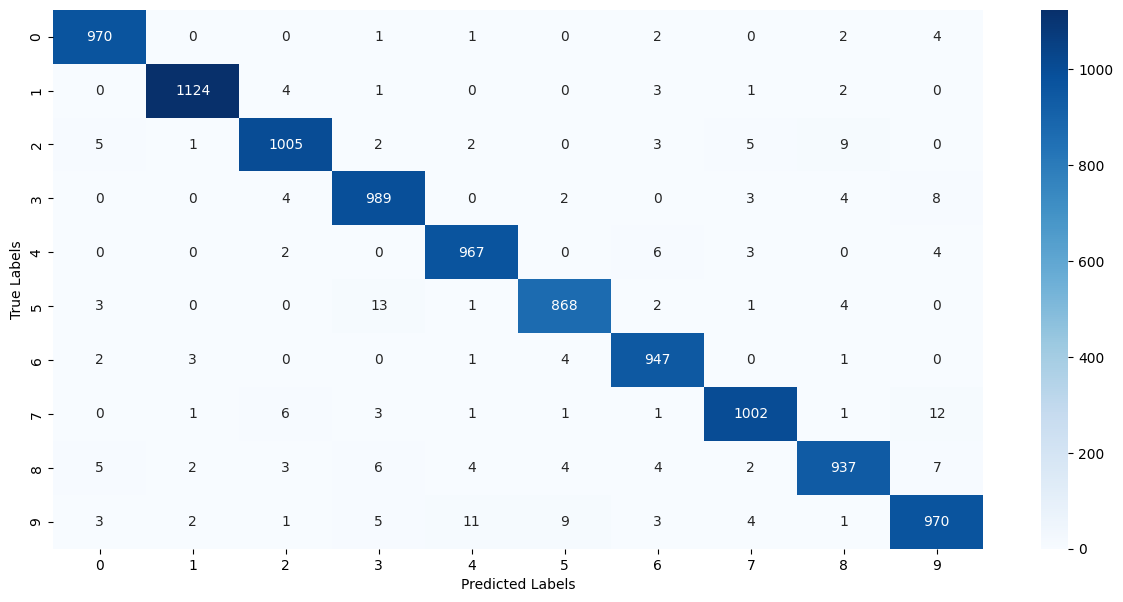

In [74]:
# Building a heatmap
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# This to show the number of correct and incorrect predictions made for each class
# Example for label 0 the predicted model made 970 predictions for '0' value , but also for the same number 0 our model predicted it as 3 '1' number of times

In [114]:
# Building a predictive system
input_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Deep Learning /Handwritten Digit Recognition /MNIST_digit.png')

In [115]:
type(input_image)

numpy.ndarray

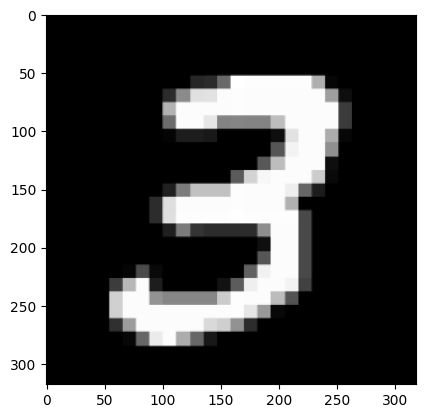

In [116]:
plt.imshow(input_image)
plt.show()

In [117]:
input_image.shape


(318, 318, 3)

Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/Deep Learning /Handwritten Digit Recognition /MNIST_digit.png


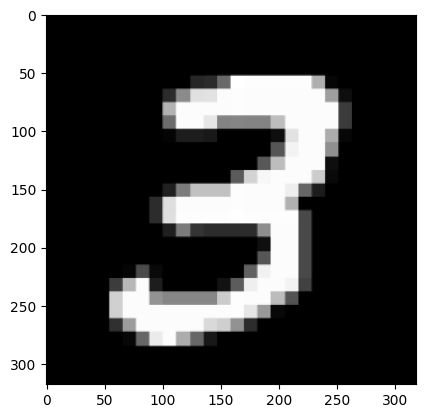

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3


In [124]:
# Building a predictive system
# Processing the image
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
plt.imshow(input_image)
plt.show()
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image = cv2.resize(input_image, (28,28))
input_image = input_image/255
prediction = model.predict(input_image.reshape(1,28,28))
prediction_label = np.argmax(prediction)
print(prediction_label)

In [125]:
if prediction_label == 0:
  print('The digit is 0')
elif prediction_label == 1:
  print('The digit is 1')
elif prediction_label == 2:
  print('The digit is 2')
elif prediction_label == 3:
  print('The digit is 3')
elif prediction_label == 4:
  print('The digit is 4')
elif prediction_label == 5:
  print('The digit is 5')
elif prediction_label == 6:
  print('The digit is 6')
elif prediction_label == 7:
  print('The digit is 7')
elif prediction_label == 8:
  print('The digit is 8')
elif prediction_label == 9:
  print('The digit is 9')
else:
  print('The digit is not recognized')

The digit is 3
